# 1. Thông tin nhóm

### *Danh sách thành viên:*

<center>
    
|   MSSV   |      Họ tên      | Tài khoản Github |
|:--------:|:----------------:|:----------------:|
| 19120119 | Nguyễn Minh Phúc |   youngtobesick  |
| 19120387 |    Lê Sỹ Thuần   |    SyThuan1803   |
    
</center>

### *Kế hoạch làm việc:* 
[Xem tại đây](https://docs.google.com/spreadsheets/d/1DCq30ORIH6m-1EYMnbUmZ8fBoxPiiCgRgLDpJaRKRVE/edit?usp=sharing)

---

# 2. Thu thập dữ liệu

#### Dữ liệu của bạn là về chủ đề gì và bạn lấy từ nguồn nào?

Dữ liệu là bảng đánh giá độ hài lòng của các khách về các khách sạn Châu Âu
</br> Dữ liệu được lấy từ nguồn được public trên [Kaggle](https://www.kaggle.com/ishansingh88/europe-hotel-satisfaction-score)

**Phần mô tả của dữ liệu**

Phần mô tả dữ liệu không có gì đặc biệt, chỉ là các dòng mô tả giá trị của các cột có trong dataset.  
Dưới đây là phần mô tả được lấy từ trang publish dataset:  

Columns
Age - 7 to 85

purposeoftravel - aviation, academic, personal, business, tourism.

Type of Travel - Group travel, Personal Travel.

Type Of Booking - Group bookings, Individual/Couple.

Hotel wifi service - Ratings out of 5.

Departure/Arrival convenience - Ratings out of 5.

Ease of Online booking - Ratings out of 5.

Hotel location - Ratings out of 5.

Food and drink - Ratings out of 5.

Stay comfort - Ratings out of 5.

Common Room entertainment - Ratings out of 5.

Checkin/Checkout service - Ratings out of 5.

Other service - Ratings out of 5.

Cleanliness - Ratings out of 5.

satisfaction - satisfied, neutral or dissatisfied.

**License của dữ liệu**

License của dữ liệu là Unknown ([nguồn](https://www.kaggle.com/ishansingh88/europe-hotel-satisfaction-score/metadata)).  
Có vẻ như người publish dữ liệu này lên Kaggle không có yêu cầu gì đối với việc sử dụng dữ liệu, hoặc cũng có thể là quên cập nhật chi tiết License. Nhưng có lẽ việc sử dụng dữ liệu với mục đích học tập thì cũng không đến nỗi nào 😓.

#### Người ta thu thập dữ liệu từ nguồn nào?

Em đã tìm hết tất cả tab ở link bên trên nhưng vẫn không thấy chỗ nào có ghi cách để thu thập bộ dữ liệu này.

Em đoán là có thể lúc khách trả phòng, họ được nhờ để điền mẫu khảo sát về các dịch vụ của khách sạn để thu thập dữ liệu. Vì title chỉ nói chung chung là Europe Hotel mà không để chi tiết là một hay nhiều hotel nào nên cũng có thể là nhóm thu thập dữ liệu tiến hành khảo sát trên cộng đồng nào đó để có thể đưa ra một bộ dữ liệu đồng nhất về các thuộc tính như thế này.

---

# 3. Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

# 4. Khám phá & tiền xử lý dữ liệu

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
# ehs là viết tắt của europe hotel satisfaction
ehs_df = pd.read_csv('./data/Europe Hotel Booking Satisfaction Score.csv')
ehs_df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows,num_cols = ehs_df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of cols: {num_cols}')

Number of rows: 103904
Number of cols: 17


Vậy là dữ liệu được thu thập hơn 100 nghìn dòng (có thể tồn tại các dòng bị trùng nhau) với khoảng 15 thuộc tính được khảo sát.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả của file dữ liệu và theo quan sát sơ bộ thì mỗi dòng đại diện cho một khảo sát của một người cụ thể với các dịch vụ của khách sạn, và nhìn chung thì em hy vọng là không có dòng nào có ý nghĩa khác với những dòng còn lại (nếu có thì trong quá trình khám phá và phân tích, ta có thể lược bỏ các dòng này sau).

### Dữ liệu có các dòng bị lặp không?

In [4]:
print(f'Duplicated rows in dataframe: {ehs_df.duplicated().sum()}')

Duplicated rows in dataframe: 0


Okay, theo như kết quả của của dòng code phía trên thì dataframe của ta không tồn tại các dòng bị trùng nhau, ta có thể tiếp tục khám phá mà không cần ở lại xử lý vấn đề bị lặp dòng này.

### Mỗi cột có ý nghĩa gì?

Tuy phần thông tin mô tả dữ liệu đã đề cập đến tên các cột và giá trị của các cột này, nhưng nó không đề cập đến ý nghĩa của tên cột nên em nghĩ là sẽ giải đáp một cách khá tương đối về vấn đề này và hy vọng là không có sự hiểu nhầm ở đây 😉.

Sau đây là ý nghĩa của các cột và các giá trị (được trích từ thông tin mô tả dữ liệu, các dòng không để giá trị ở dưới đây mặc định là điểm ratings từ 0-5):

|Thuộc tính|    Ý nghĩa   |
|:--------:|:-----:|
|**id**|ID của survey||
|**Gender**|Giới tính người thực hiện survey|
|**Age**|Tuổi của đối tượng khảo sát (từ 7-85)| 
|**purpose_of_travel**|Mục đích của chuyến đi trong lúc sử dụng khách sạn (gồm aviation, academic, personal, business, tourism)|
|**type_of_travel**|Loại chuyến đi (gồm Group travel, Personal Travel)|
|**Type of Booking**|Loại đặt phòng (gồm Group bookings, Individual/Couple)|
|**Hotel wifi service**|Wifi của khách sạn|
|**Departure/Arrival  convenience**|Tiện nghi khi đến|
|**Ease of Online booking**|Thoải mái booking online|
|**Hotel location**|Địa điểm hotel|
|**Food and drink**|Thức ăn và đồ uống|
|**Stay comfort**|Chỗ ở thoải mái|
|**Common Room entertainment**|Phòng giải trí chung|
|**Checkin/Checkout service**|Dịch vụ check in/ check out|
|**Other service**|Dịch vụ khác|
|**Cleanliness**|Sạch sẽ|
|**satisfaction**|Độ hài lòng của khách (gồm satisfied, neutral or dissatisfied)|

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Trước khi xem kiểu dữ liệu của các cột, ta cần format tên cột theo một chuẩn nhất định để dễ thao tác hơn. Chuẩn được đặt ra ở đây đó chính là viết thường các ký tự tên cột và thay thế khoảng trắng bằng dấu gạch dưới (underscore)

In [5]:
def convert_name(old_name):
    new_name = old_name.lower()
    new_name = new_name.replace('  ', '_')
    new_name = new_name.replace(' ', '_')
    new_name = new_name.replace('/', '_')
    return new_name

ehs_df.rename(columns=convert_name, inplace=True)
ehs_df.columns

Index(['id', 'gender', 'age', 'purpose_of_travel', 'type_of_travel',
       'type_of_booking', 'hotel_wifi_service',
       'departure_arrival_convenience', 'ease_of_online_booking',
       'hotel_location', 'food_and_drink', 'stay_comfort',
       'common_room_entertainment', 'checkin_checkout_service',
       'other_service', 'cleanliness', 'satisfaction'],
      dtype='object')

In [6]:
col_dtypes = ehs_df.dtypes
col_dtypes

id                                int64
gender                           object
age                               int64
purpose_of_travel                object
type_of_travel                   object
type_of_booking                  object
hotel_wifi_service                int64
departure_arrival_convenience     int64
ease_of_online_booking            int64
hotel_location                    int64
food_and_drink                    int64
stay_comfort                      int64
common_room_entertainment         int64
checkin_checkout_service          int64
other_service                     int64
cleanliness                       int64
satisfaction                     object
dtype: object

Hiện tại thì `ehs_df` chỉ có 5 cột có `dtype` là `object`: "gender", "purpose_of_travel", "type_of_travel", "type_of_booking", "satisfaction". Chúng ta sẽ thử xem các cột này đang giữ các kiểu dữ liệu nào.

In [7]:
def open_object_dtype(s):
    return set(s.apply(type))

obj_cols_name = ["gender", "purpose_of_travel",
                 "type_of_travel", "type_of_booking", "satisfaction"]

for col_name in obj_cols_name:
    print(f"{col_name}: {open_object_dtype(ehs_df[col_name])}")

gender: {<class 'str'>}
purpose_of_travel: {<class 'str'>}
type_of_travel: {<class 'str'>}
type_of_booking: {<class 'str'>}
satisfaction: {<class 'str'>}


**Vấn đề cần tiền xử lý:**
- Cột Type Of Booking có giá trị là Not defined tương tự với việc đánh dấu giá trị thiếu, nên cần phải điền vào những ô có giá trị này.

## Tiền xử lý

**Thay thế những ô có giá trị Not defined trong cột Type of booking**

*Phương pháp:*
- Thay thế giá trị Not defined bằng 2 giá trị còn lại trong cột Type of booking bằng phương pháp max similarity (độ tương tự lớn nhất)

In [8]:
# Chuyển hết giá trị Not defined thành NaN
ehs_df.loc[ehs_df['type_of_booking'] == 'Not defined', 'type_of_booking'] = np.nan

In [9]:
# Chuẩn hóa các cột Categorical thành cột có dạng số

ehs_df['gender'] = ehs_df['gender'].replace(['Male'],1)
ehs_df['gender'] =ehs_df['gender'].replace(['Female'],2)

ehs_df['type_of_travel'] = ehs_df['type_of_travel'].replace(['Personal Travel'],1)
ehs_df['type_of_travel'] = ehs_df['type_of_travel'].replace(['Group Travel'],2)

ehs_df['satisfaction'] = ehs_df['satisfaction'].replace(['neutral or dissatisfied'],0)
ehs_df['satisfaction'] = ehs_df['satisfaction'].replace(['satisfied'],1)
ehs_df['type_of_booking'] = ehs_df['type_of_booking'].replace(['Individual/Couple'],1)
ehs_df['type_of_booking'] = ehs_df['type_of_booking'].replace(['Group bookings'],2)

ehs_df['purpose_of_travel'] = ehs_df['purpose_of_travel'].replace(['tourism'],5)
ehs_df['purpose_of_travel'] = ehs_df['purpose_of_travel'].replace(['academic'],4)
ehs_df['purpose_of_travel'] = ehs_df['purpose_of_travel'].replace(['business'],3)
ehs_df['purpose_of_travel'] = ehs_df['purpose_of_travel'].replace(['aviation'],2)
ehs_df['purpose_of_travel'] = ehs_df['purpose_of_travel'].replace(['personal'],1)

In [10]:
sample_df_isnan=ehs_df[ehs_df['type_of_booking'].isna()]
sample_df_isnan

,id,gender,age,purpose_of_travel,type_of_travel,type_of_booking,hotel_wifi_service,departure_arrival_convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin_checkout_service,other_service,cleanliness,satisfaction
0,70172,1,13,2,1,NaN,3,4,3,1,5,5,5,4,5,5,0
11,51412,2,12,5,1,NaN,2,4,2,2,1,1,1,5,5,1,0
27,14925,2,49,3,2,NaN,4,4,4,4,2,1,4,2,4,2,1
37,48014,1,40,1,1,NaN,4,3,4,2,2,2,2,3,4,2,0
69,9261,2,38,1,2,NaN,4,4,4,4,4,4,4,1,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103811,12866,1,27,1,2,NaN,4,4,4,4,4,4,4,3,4,4,0
103867,81857,1,30,1,2,NaN,3,2,2,2,3,3,3,2,3,3,0
103868,37051,2,57,1,1,NaN,1,5,1,5,4,3,5,1,5,1,0
103877,14662,1,27,5,2,NaN,5,4,4,4,5,5,5,2,3,5,1


Có tổng cộng 7494 dòng cần điền.  
Do số lượng dữ liệu quá nhiều dẫn đến tốn nhiều trong lúc thực hiện nên nhóm sẽ lấy mẫu bao gồm 1000 dòng không chứa giá trị NaN để suy ra giá trị NaN.  
Lấy random mẫu số lượng 1000 dòng không chứa giá trị NaN và nối vào dataframe chứa giá trị NaN ở trên.

In [11]:
sample_df=ehs_df[~ehs_df['type_of_booking'].isna()]
sample_df=sample_df.sample(frac=0.01, random_state=30).reset_index(drop=True)
sample_df1=pd.concat((sample_df_isnan,sample_df),axis=0).reset_index(drop=True)
sample_df1

,id,gender,age,purpose_of_travel,type_of_travel,type_of_booking,hotel_wifi_service,departure_arrival_convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin_checkout_service,other_service,cleanliness,satisfaction
0,70172,1,13,2,1,NaN,3,4,3,1,5,5,5,4,5,5,0
1,51412,2,12,5,1,NaN,2,4,2,2,1,1,1,5,5,1,0
2,14925,2,49,3,2,NaN,4,4,4,4,2,1,4,2,4,2,1
3,48014,1,40,1,1,NaN,4,3,4,2,2,2,2,3,4,2,0
4,9261,2,38,1,2,NaN,4,4,4,4,4,4,4,1,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8453,61001,2,45,5,2,1.0,2,1,2,3,5,5,5,1,2,5,0
8454,112706,1,39,5,2,1.0,4,4,4,3,1,1,1,1,4,1,0
8455,2663,2,53,3,2,2.0,5,5,5,5,3,5,4,5,4,5,1
8456,46666,1,30,4,2,2.0,4,1,1,1,2,4,2,1,3,2,0


In [12]:
# Đưa dữ liệu của dataframe về numpy array để bắt đầu xử lý tính độ tương tự lớn nhất
ratings=sample_df1.drop('id',axis=1)
ratings['type_of_booking']=pd.to_numeric(ratings['type_of_booking'])
ratings=ratings.astype('float64')
ratings=np.array(ratings.iloc[:,:])
ratings

array([[ 1., 13.,  2., ...,  5.,  5.,  0.],
       [ 2., 12.,  5., ...,  5.,  1.,  0.],
       [ 2., 49.,  3., ...,  4.,  2.,  1.],
       ...,
       [ 2., 53.,  3., ...,  4.,  5.,  1.],
       [ 1., 30.,  4., ...,  3.,  2.,  0.],
       [ 2., 23.,  4., ...,  4.,  5.,  1.]])

In [13]:
# Tiến hành tính giá trị cần điền bằng độ tương tự lớn nhất
batch_size = 32
filled_ratings = np.empty_like(ratings)
start = 0
end = batch_size
new_ratings=np.tile(ratings,(batch_size,1))
while(1):
    if (start>=len(ratings)):
        break
    r=ratings[start:end,:]
    if batch_size != 32:
        new_ratings=np.tile(ratings,(batch_size,1))
    r= np.repeat(r, repeats=len(ratings), axis=0)
    a=np.abs(new_ratings[:,:] -r)
    #Tao similarities
    similarities=np.zeros((batch_size,len(ratings)))
    startRow=0
    for ind in range(batch_size):
        similarities[ind]=(1/(np.nanmean(a[startRow:startRow+len(ratings)],axis=1)+0.001))
        startRow+=len(ratings)
    similarities=np.nan_to_num(similarities,nan=0) 
    weights=np.zeros((batch_size,len(ratings),ratings.shape[1]))
    for ind in range(batch_size):
        normalize_w=~np.isnan(ratings)*similarities[ind].reshape(-1,1)
        weights[ind]=normalize_w/normalize_w.sum(axis=0)
    filled_ratingsBatch=np.nansum(ratings*weights,axis=1)
    filled_ratings[start:end]=filled_ratingsBatch
    start=end
    end=start+batch_size
    if(end>len(ratings)):
        end=len(ratings)
        batch_size=end-start

In [14]:
filled_nanvals = filled_ratings[np.isnan(ratings)].round(0)
sample_df_isnan.loc[:,'type_of_booking']=filled_nanvals
ehs_df=ehs_df[~ehs_df['type_of_booking'].isna()]
# sample_df=pd.concat((sample_df,sample_df_isnan),axis=0).reset_index(drop=True)
ehs_df=pd.concat((sample_df_isnan,ehs_df),ignore_index=True,axis=0)
ehs_df=ehs_df.sample(frac=1, random_state=42).reset_index(drop=True)
ehs_df

C:\Users\mPhncs\miniconda3\envs\min_ds-env\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,id,gender,age,purpose_of_travel,type_of_travel,type_of_booking,hotel_wifi_service,departure_arrival_convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin_checkout_service,other_service,cleanliness,satisfaction
0,6876,1,54,2,2,2.0,5,5,5,5,5,5,4,5,4,5,1
1,12539,2,38,3,2,1.0,1,1,1,4,3,3,3,4,4,3,0
2,113491,1,51,2,2,2.0,5,5,5,5,5,5,4,3,4,5,1
3,121799,2,50,5,2,2.0,3,4,3,3,4,4,5,3,5,5,1
4,40429,1,28,5,2,2.0,1,1,1,1,5,4,5,5,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,99345,2,26,5,2,2.0,4,2,5,2,4,4,4,4,3,4,0
103900,93551,2,40,4,2,2.0,1,1,1,1,4,5,5,3,5,5,1
103901,77673,1,28,4,2,2.0,3,3,3,3,2,3,2,4,4,2,0
103902,89983,2,38,3,2,2.0,1,1,1,1,1,1,1,2,3,1,0


In [15]:
# Kiểm tra còn dòng NaN không
ehs_df[ehs_df['type_of_booking'].isna()]

,id,gender,age,purpose_of_travel,type_of_travel,type_of_booking,hotel_wifi_service,departure_arrival_convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin_checkout_service,other_service,cleanliness,satisfaction


Dữ liệu đã được điền đầy đủ.

---

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Sau khi thực hiện bước tiền xử lý phía trên thì ta xếp 11 cột sau vào nhóm numeric: "age", "hotel_wifi_service", "departure_arrival_convenience", "ease_of_online_booking", "hotel_location", "food_and_drink", "stay_comfort", "common_room_entertainment", "checkin_checkout_service", "other_service", "cleanliness".

Các cột còn lại mặc dù có kiểu số nhưng thật ra có dạng categorical (vì là mã được đánh dưới dạng số). Như vậy, chỉ có 11 cột numeric và các cột ngoại trừ "age" đều là thang điểm từ 0-5.

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max và lưu kết quả vào dataframe nume_col_profiles_df. Dataframe này có 4 dòng là "missing_ratio", "min", "mean", "max"; và có 11 cột có tên được nêu ở trên.

In [17]:
def missing_ratio(s):
    return s.isna().mean() * 100

cate_col_name = ["id", "gender", "purpose_of_travel", "type_of_travel", "type_of_booking", "satisfaction"]
nume_col_idx = ehs_df.columns.drop(cate_col_name)
nume_col_df = ehs_df[nume_col_idx]
nume_col_profiles_df = nume_col_df.agg([missing_ratio, pd.Series.min,pd.Series.mean, pd.Series.max])

nume_col_profiles_df

,age,hotel_wifi_service,departure_arrival_convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin_checkout_service,other_service,cleanliness
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
mean,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.439396,3.358158,3.30429,3.640428,3.286351
max,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000


**Nhận xét các dữ liệu số:**
- Độ tuổi trung bình của người thực hiện khảo sát là 39 tuổi, nhỏ nhất là 7 tuổi, lớn nhất là 85 tuổi 
- Các chỉ số đánh giá mức độ hài lòng từ 0 đến 5
- Các giá trị trung bình của chỉ số đánh giá nằm từ 2 đến 3, nhìn chung cũng khá cân bằng

Ta sẽ xem rõ hơn về sự phân bố của các giá trị trong mỗi cột có kiểu là numeric bằng hàm plot_hist_cols với hai tham số truyền vào là dataframe và số cột.

In [18]:
def plot_hist_cols(df, num_graph_per_row):
    n_rows, n_cols = df.shape
    col_names = list(df.columns)
    n_rows_graph = (n_cols + num_graph_per_row - 1) / num_graph_per_row
    
    plt.figure(
        figsize = (6 * num_graph_per_row,  6 * n_rows_graph),
        dpi = 80,
    )
    
    for i in range(n_cols):
        plt.subplot(int(n_rows_graph), num_graph_per_row, i + 1)
        col_i = df.iloc[:, i]
        
        if (not np.issubdtype(type(col_i.iloc[0]), np.number)):
            val_counts = col_i.value_counts()
            plt.xticks(rotation = 90)
            val_counts.plot.bar()
        else:
            nunique_col_i = col_i.nunique()
            bins = nunique_col_i if (nunique_col_i < 10) else 10
            col_i.hist(bins=bins)
        
        plt.ylabel('counts')
        plt.title(f'{col_names[i]}')
        
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()

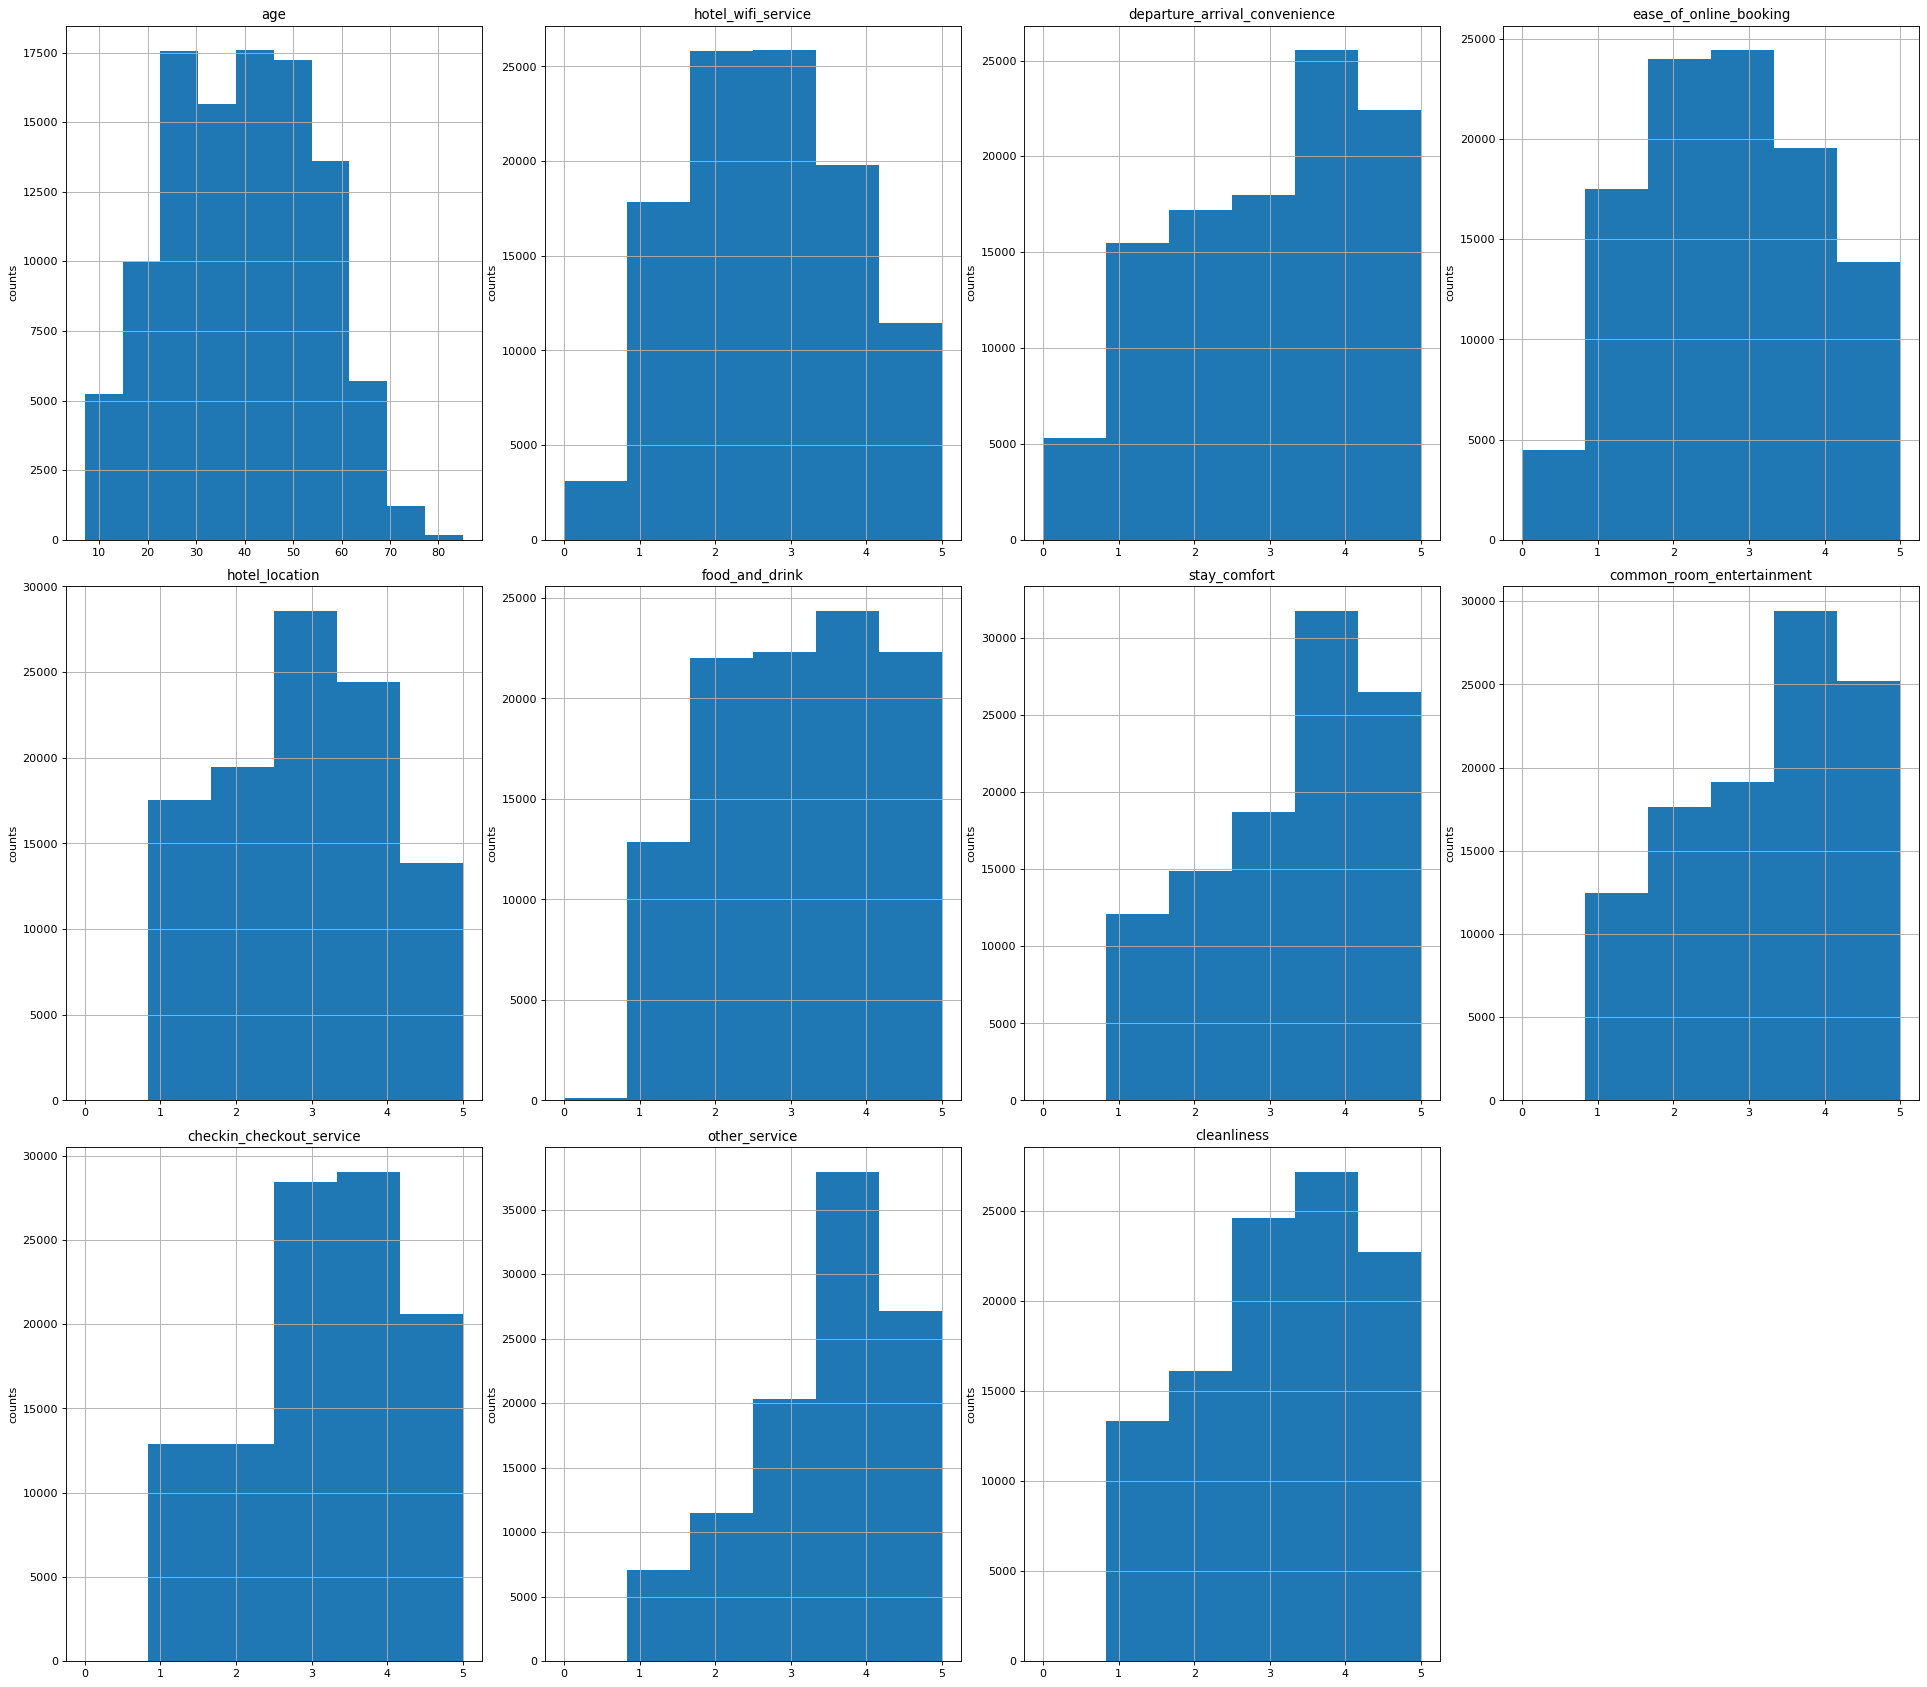

In [19]:
plot_hist_cols(nume_col_df, 4)

**Nhận xét:**
- Gender: có 2 loại nam, nữ
- Purpose_of_travel: có 5 giá trị aviation(hàng không), tourism(theo tour), business(công việc), academic(trường học), personal(cá nhân)
- Type of travel: Personal Travel(cá nhân), Group Travel(theo nhóm)
- Type of booking: Not defined(không xác định), Group bookings(theo nhóm), Individual/Couple(cá nhân/ cặp đôi)
- Satisfaction: neutral or dissatisfied(bình thường hoặc không hài lòng), satisfied(hài lòng)

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

`ehs_df` có 5 cột categorical là "id", "gender", "purpose_of_travel", "type_of_travel", "type_of_booking".

Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu), và lưu kết quả vào dataframe cate_col_profiles_df. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 5 cột là "id", "gender", "purpose_of_travel", "type_of_travel", "type_of_booking".

In [20]:
cate_col_df = ehs_df[cate_col_name]

cate_col_profiles_df = cate_col_df.agg([missing_ratio, pd.Series.nunique, pd.Series.unique])

cate_col_profiles_df.rename(
    index={'nunique': 'num_diff_vals', 'unique': "diff_vals"},
    inplace=True
)

cate_col_profiles_df

,id,gender,purpose_of_travel,type_of_travel,type_of_booking,satisfaction
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,103904,2,5,2,2,2
diff_vals,"[6876, 12539, 113491, 121799, 40429, 81037, 35...","[1, 2]","[2, 3, 5, 4, 1]","[2, 1]","[2.0, 1.0]","[1, 0]"


Ta sẽ xem rõ hơn về sự phân bố của các giá trị trong mỗi cột có kiểu là categorical

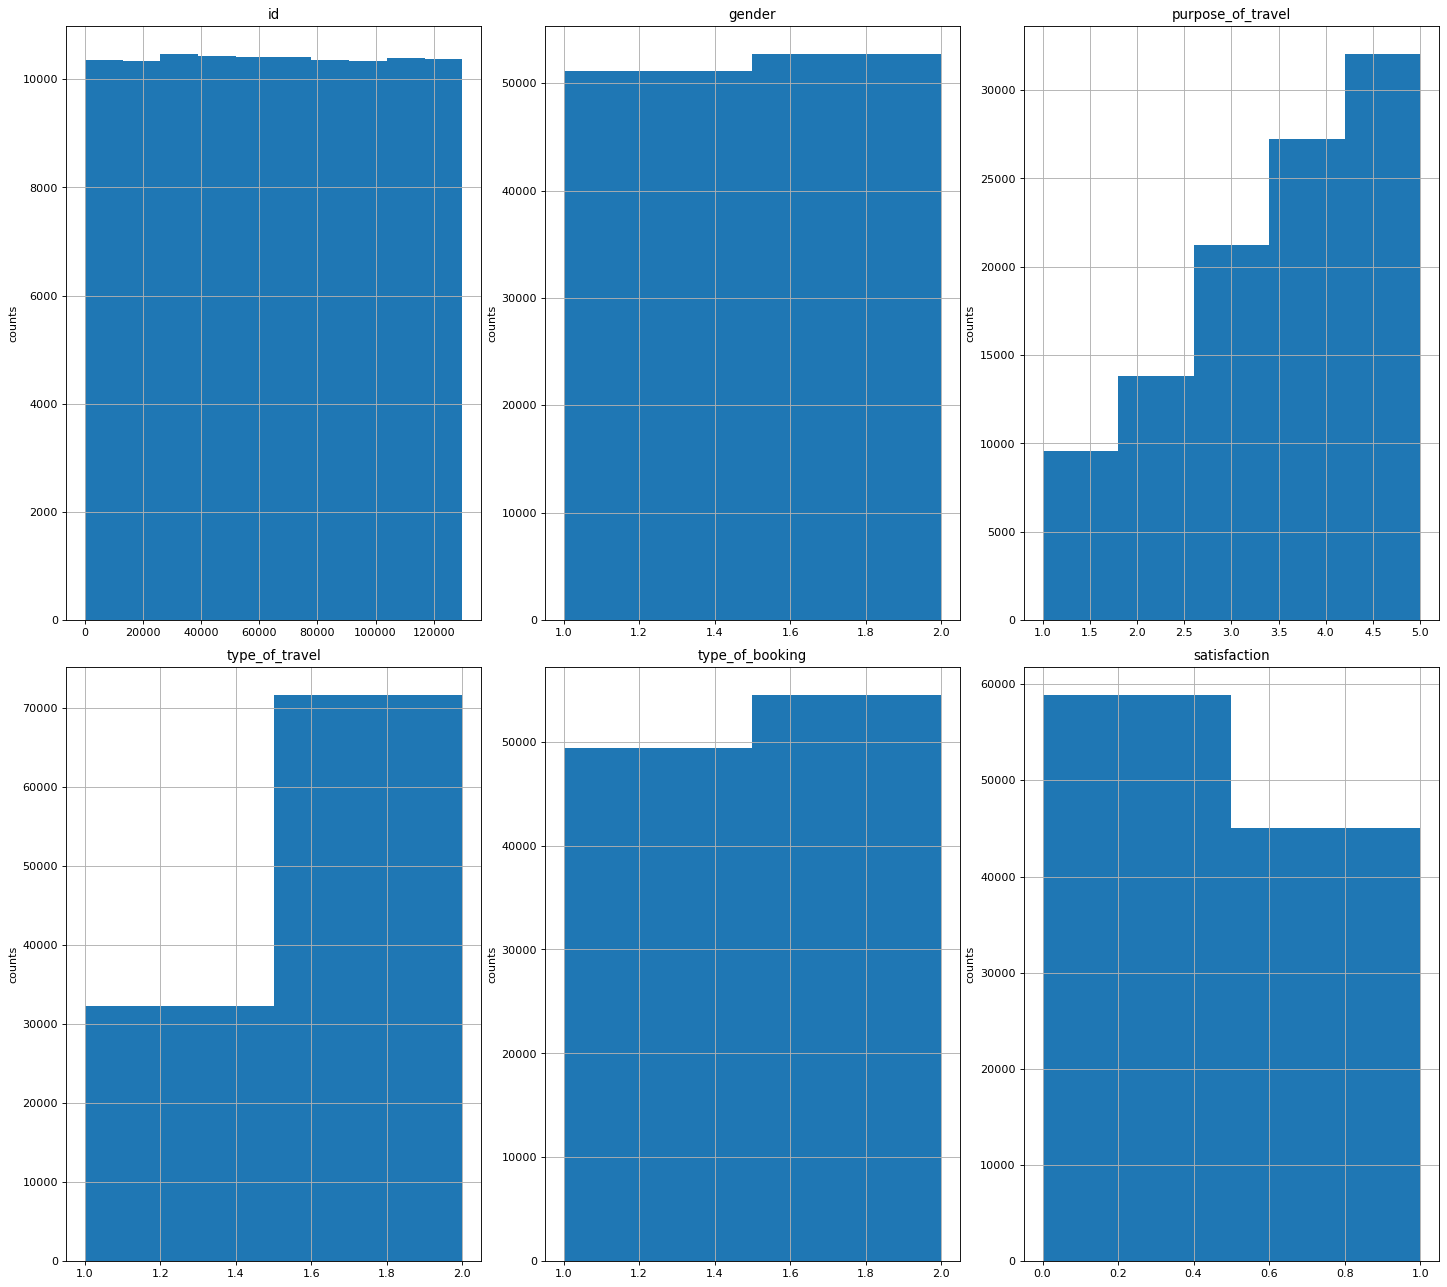

In [21]:
plot_hist_cols(cate_col_df, 3)

---

# 5. Đưa ra các câu hỏi cần trả lời

#### Câu 1: Mục đích chuyến đi có sự đánh giá độ hài lòng khác nhau như thế nào?
Trả lời được câu hỏi này sẽ cho ta biết được các tiêu chí trong mục đích chuyến đi để chuẩn bị tốt hơn cho các hợp đồng của công ty với khách sạn sau này.

#### Câu 2: Các yếu tố ảnh hưởng đến sự hài lòng giữa nam và nữ khác nhau như thế nào?
Trả lời được câu hỏi này để khách sạn cần chú ý hơn vào phụ nữ để tăng doanh thu, vì phụ nữ thường là người đứng ra chi trả các khoảng phí.

#### Câu 3: Trong tất cả các yếu tố được chấm điểm, những yếu tố nào quan trọng nhất để một khách sạn sẽ được đánh giá hài lòng? 
Trả lời được câu hỏi này để nếu ở Việt Nam muốn mở một khách sạn thì sẽ tham khảo những yếu tố này để cải thiện, nâng cấp.

#### Câu 4: Độ tuổi của khách hàng đối với từng mục đích chuyến đi ảnh hưởng như thế nào đến sự hài lòng?
Trả lời được câu hỏi này sẽ giúp khách sạn có những phương án phù hợp tùy theo độ tuổi và mục đích chuyến đi để phát triển, đáp ứng nhu cầu của khách hàng.

---

# 6.Tiền xử lý, phân tích dữ liệu để trả lời cho từng câu hỏi

## 6.1 Câu hỏi 1

### Tiền xử lý

### Phân tích dữ liệu để trả lời cho các câu hỏi 

---

## 6.2 Câu hỏi 2

### Tiền xử lý

### Phân tích dữ liệu để trả lời cho các câu hỏi 

---

## 6.3 Câu hỏi 3

### Tiền xử lý

### Phân tích dữ liệu để trả lời cho các câu hỏi 

---

## 6.4 Câu hỏi 4

### Tiền xử lý

### Phân tích dữ liệu để trả lời cho các câu hỏi 

---

# 7. Nhìn lại quá trình làm đồ án

## Thành viên 1

- Họ tên:
- Đã gặp những khó khăn gì?
- Có học được gì hữu ích?

## Thành viên 2

- Họ tên:
- Đã gặp những khó khăn gì?
- Có học được gì hữu ích?

## Nhóm
**Nếu có thêm thời gian thì sẽ làm gì?**

# 8. Tài liệu tham khảo